<a href="https://colab.research.google.com/github/DiegoMacielDM/MachineLearning/blob/main/RegressaoLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import as bibliotecas do python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Configurando o notebook
sns.set_style()

In [3]:
#importando o dados
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv")

In [4]:
#mostrando od dados
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
#importando o Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [8]:
#Informando o X e o Y... Mas atenção com o I-feature  (reshape)
#X vai ser toda a base excluindo o coluna SalePrice
x = df.drop('num', axis=1)

#Y vai ser apenas a coluna SalePrice
y = df['num']

#iniciando os train
x_train, x_test, y_train, y_test = train_test_split(x, y)

#Criando e treinando oum modelo de regressão linear
ml_model = LogisticRegression(C=0.01)
ml_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
#Previsões em cima do dataset de teste
y_pred = ml_model.predict(x_test)
y_prob = ml_model.predict_proba(x_test)

In [11]:
print(y_pred[:5])
print(y_prob[:5])

[0 0 0 1 0]
[[0.8428751  0.11386285 0.02045117 0.01611871 0.00669218]
 [0.36456549 0.25165175 0.18990662 0.14200176 0.05187438]
 [0.46339679 0.23995043 0.11942419 0.11987149 0.0573571 ]
 [0.19677831 0.31684515 0.18483986 0.24254422 0.05899245]
 [0.82886045 0.10695152 0.02843308 0.02151903 0.01423593]]


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86        45
           1       0.20      0.17      0.18        12
           2       0.40      0.25      0.31         8
           3       0.50      0.25      0.33         8
           4       0.00      0.00      0.00         3

    accuracy                           0.66        76
   macro avg       0.37      0.33      0.34        76
weighted avg       0.58      0.66      0.61        76



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


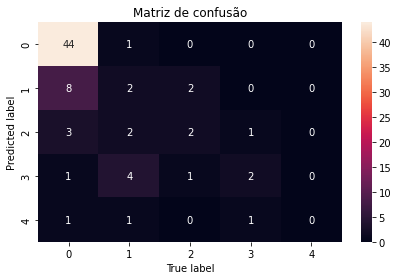

In [15]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de confusão")
ax.set_xlabel("True label")
ax.set_ylabel("Predicted label")

plt.tight_layout()